In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\psath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Major steps invloved in EDA
1. Check for Duplicates

2. Handle missing values

3. Handle outliers

4. Descriptive Statistics

5. Data Visualization

6. Feature Scaling: Standardization & Normalization

7. Binning & Encoding

In [2]:
df1 = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Insurance)\insurance.csv", skipinitialspace = True)

In [3]:
df1.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Duplicates

In [5]:
df1.duplicated()
df1.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [6]:
# Dataframe indexing
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df1.iloc[550:600]

,age,sex,bmi,children,smoker,region,charges
550,63,male,30.800,0,no,southwest,13390.55900
551,32,female,28.930,0,no,southeast,3972.92470
552,62,male,21.400,0,no,southwest,12957.11800
553,52,female,31.730,2,no,northwest,11187.65670
554,25,female,41.325,0,no,northeast,17878.90068
555,28,male,23.800,2,no,southwest,3847.67400
556,46,male,33.440,1,no,northeast,8334.58960
557,34,male,34.210,0,no,southeast,3935.17990
558,35,female,34.105,3,yes,northwest,39983.42595
559,19,male,35.530,0,no,northwest,1646.42970


In [8]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df1.shape

(1337, 7)

### Identifying Null Values

In [11]:
df1.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**There are no null values**

### Identify Corrupted Data 

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**No corrupted data so no need of converting convert currupted data into missing values**

**No missing values so no need of dropping rows**

### Outliers

In [14]:
df1.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

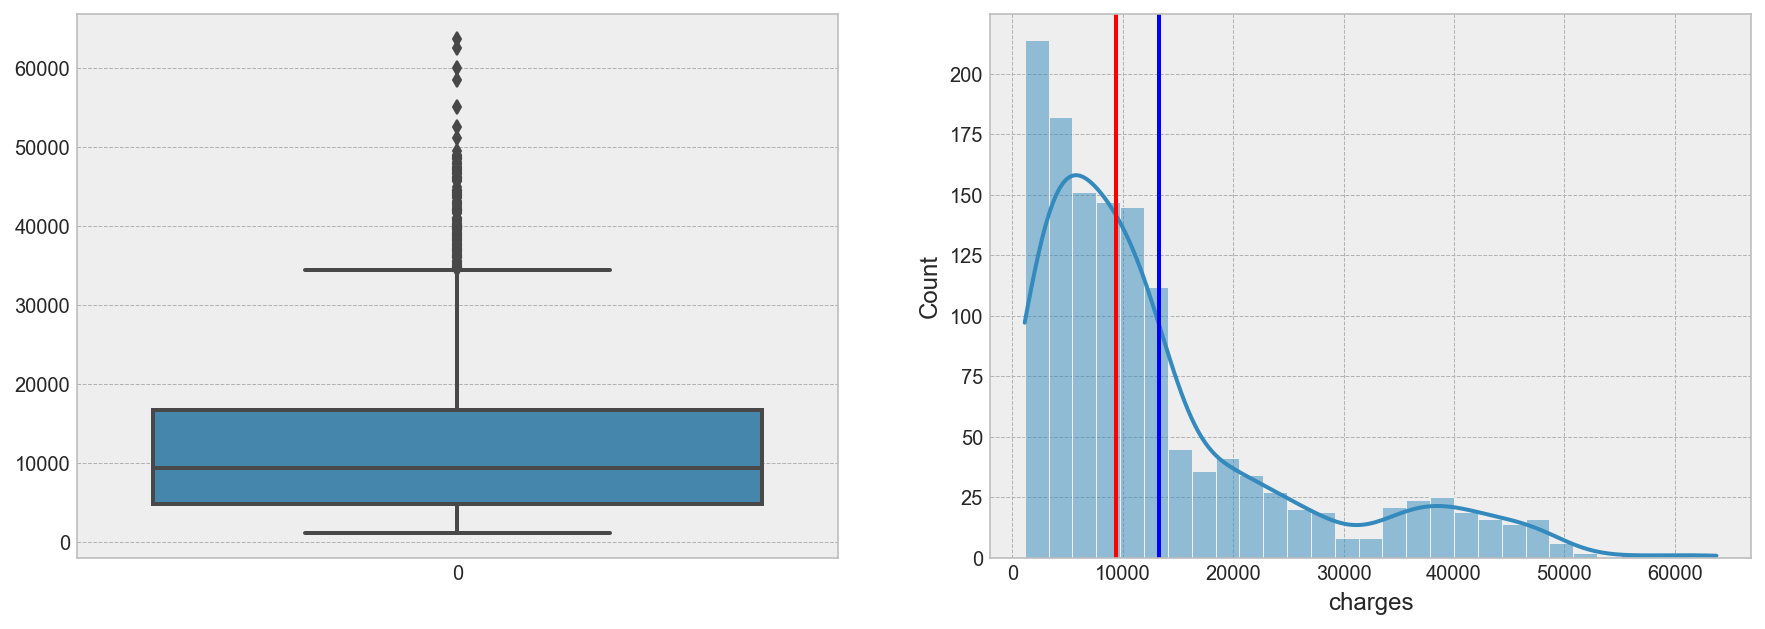

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

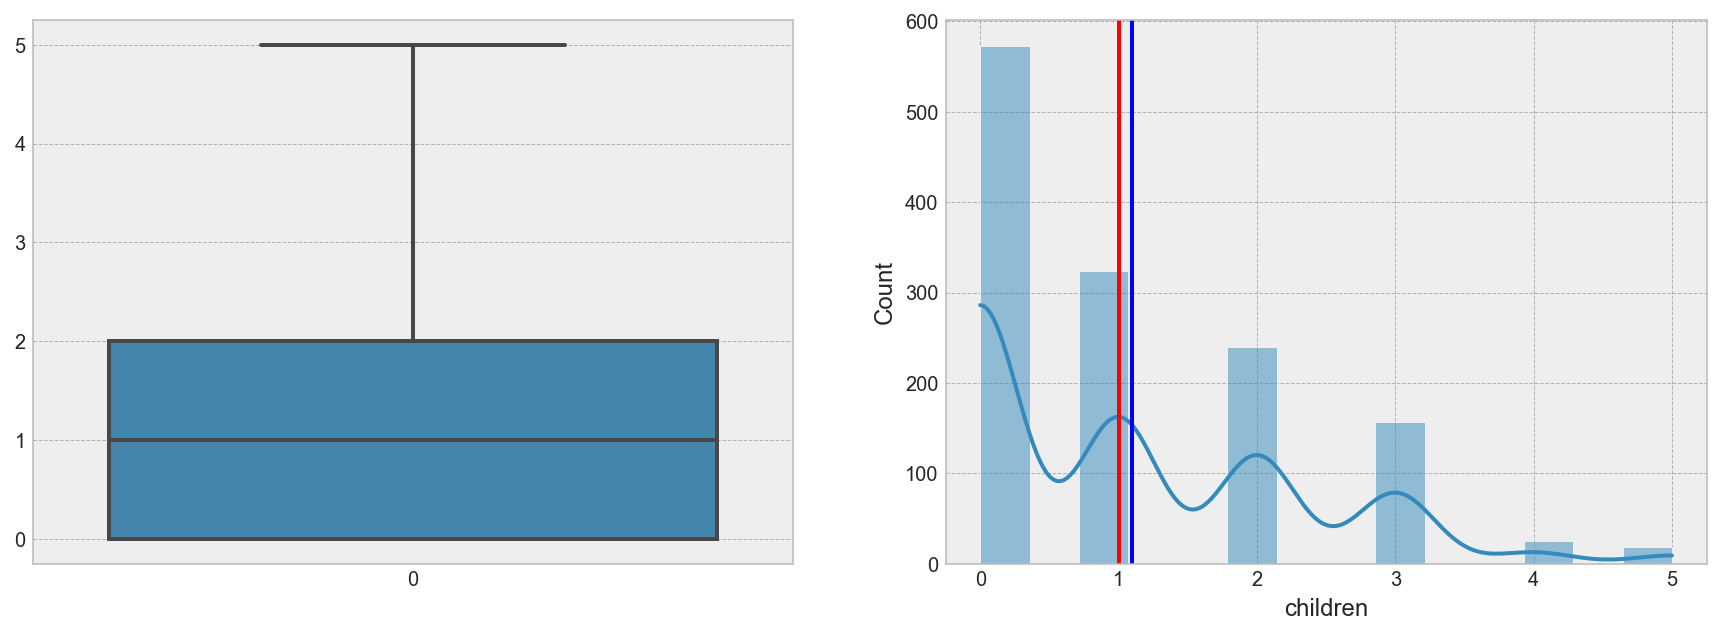

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.children)

plt.subplot(122)
sns.histplot(df1.children, kde = True)
plt.axvline(df1.children.mean(), color = 'blue')
plt.axvline(df1.children.median(), color = 'red');

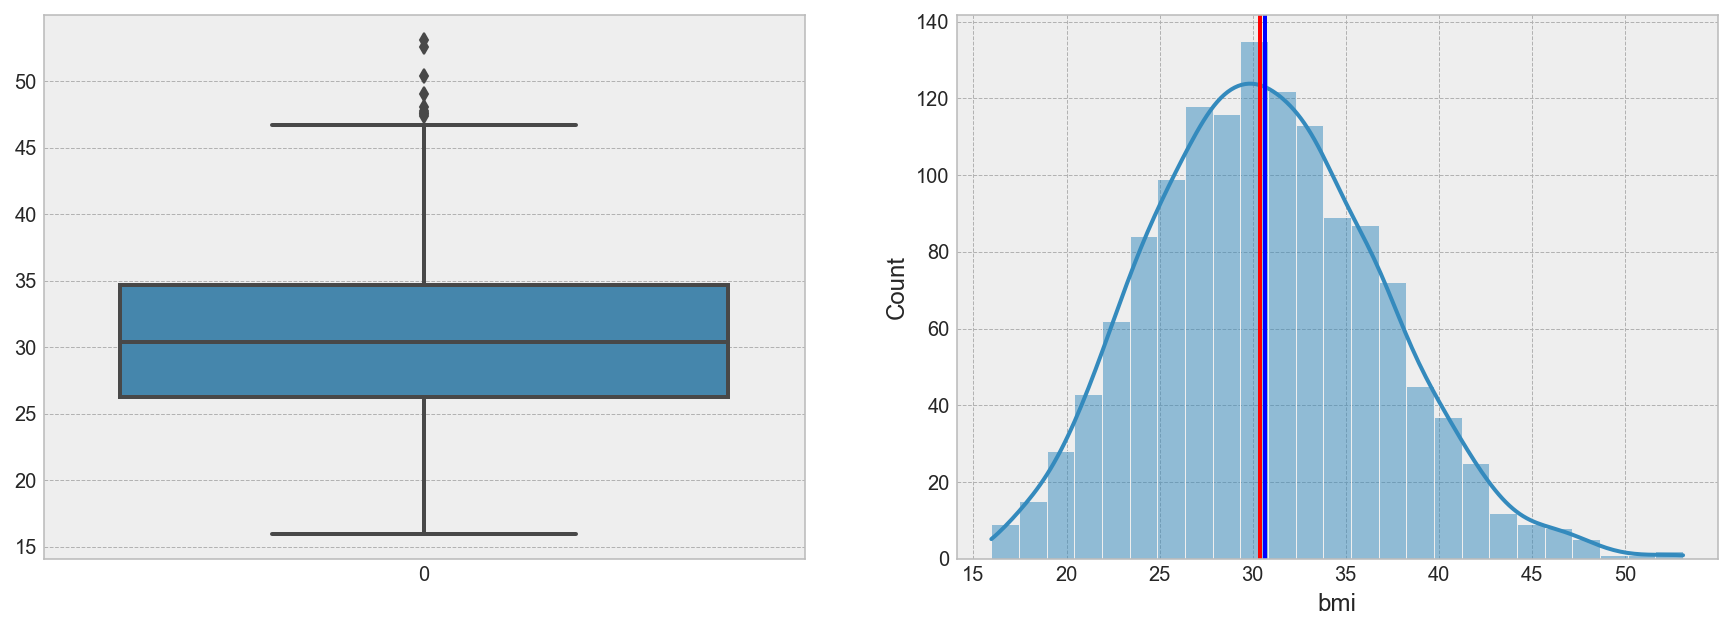

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.bmi)

plt.subplot(122)
sns.histplot(df1.bmi, kde = True)
plt.axvline(df1.bmi.mean(), color = 'blue')
plt.axvline(df1.bmi.median(), color = 'red');

### Analysis

In [18]:
df1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


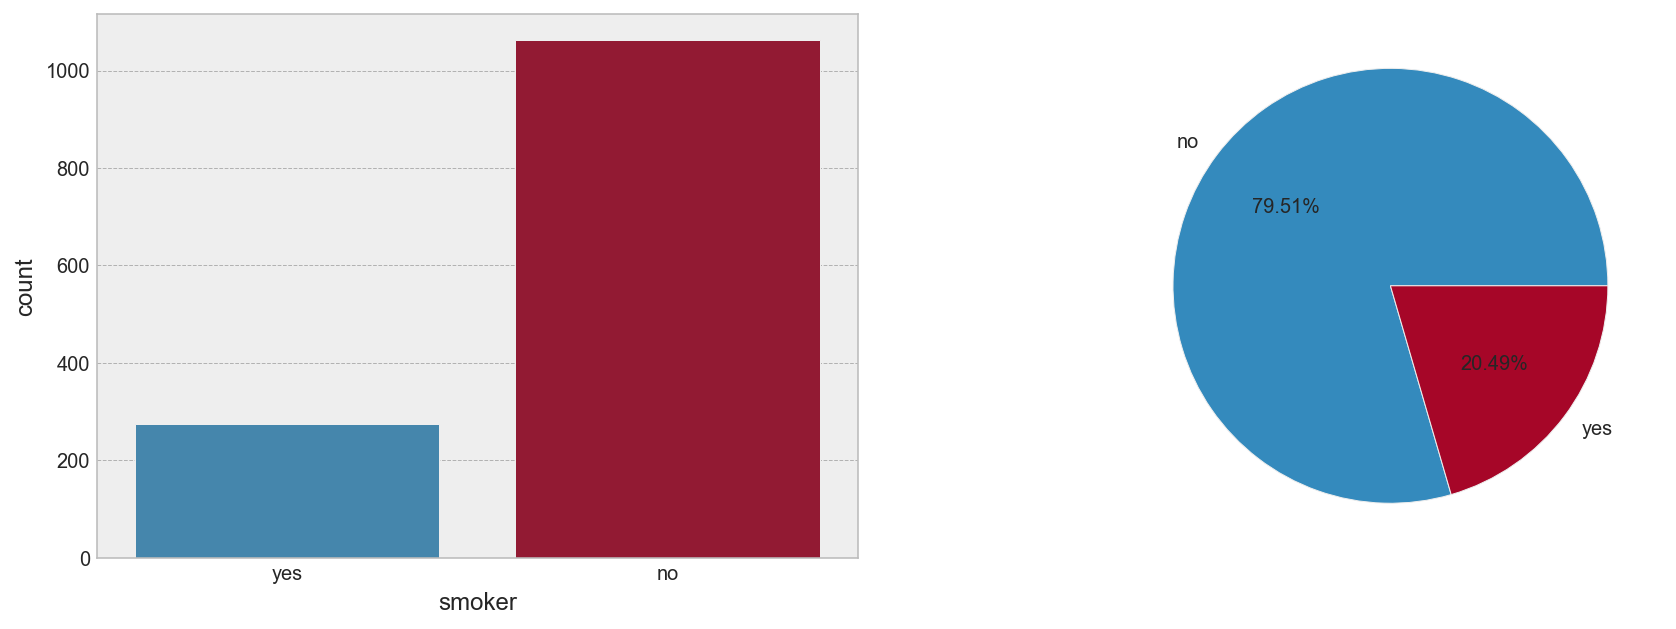

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df1.smoker)
plt.subplot(122)
plt.pie(df1.smoker.value_counts().values,labels=df1.smoker.value_counts().index,autopct='%.2f%%');

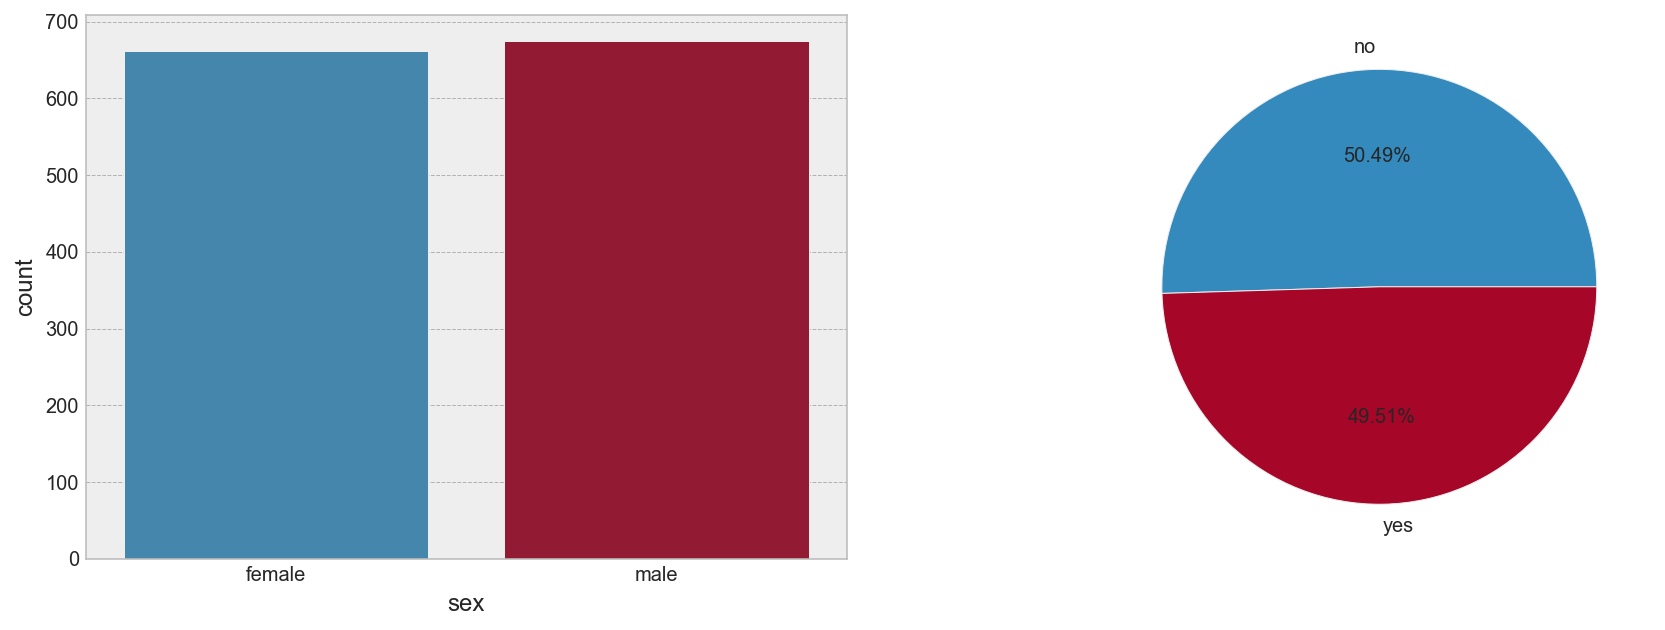

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df1.sex)
plt.subplot(122)
plt.pie(df1.sex.value_counts().values,labels=df1.smoker.value_counts().index,autopct='%.2f%%');

<AxesSubplot:xlabel='age', ylabel='charges'>

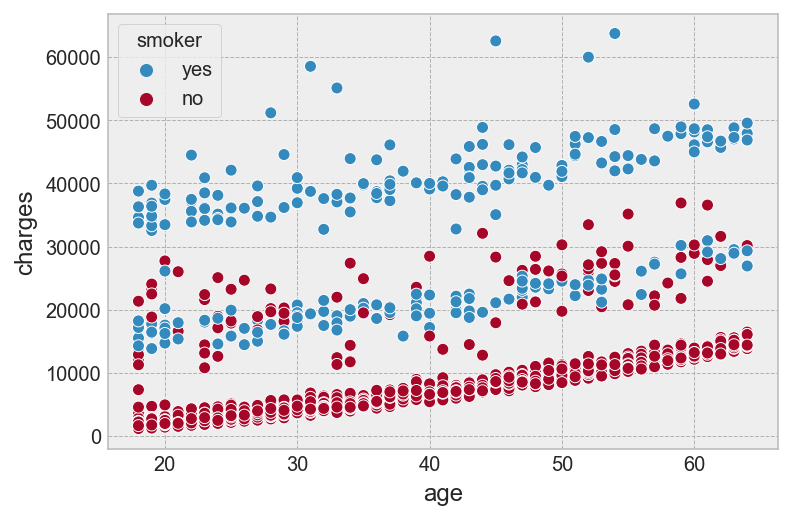

In [21]:
sns.scatterplot(x=df1.age,y=df1.charges,hue=df1.smoker)

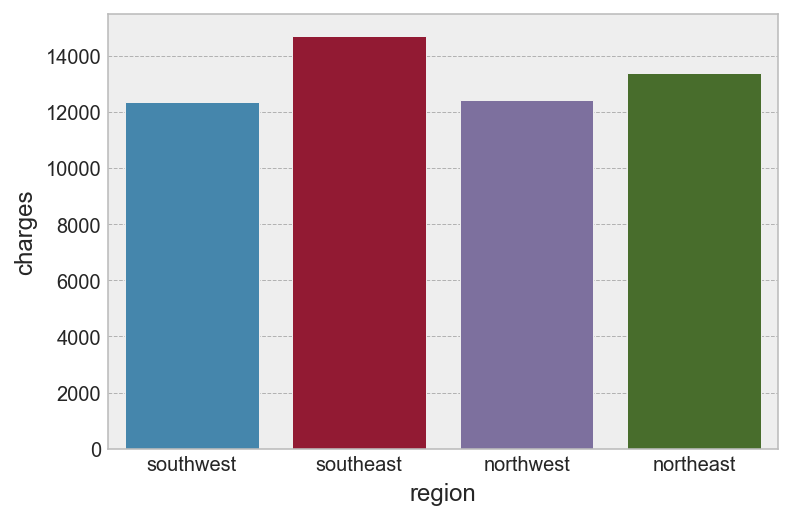

In [22]:
sns.barplot(x=df1.region,y=df1.charges,ci=False);

<AxesSubplot:>

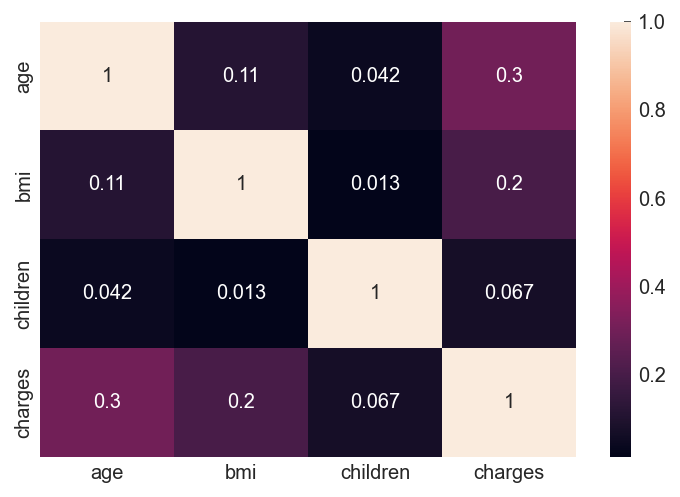

In [23]:
sns.heatmap(df1.corr(),annot=True)

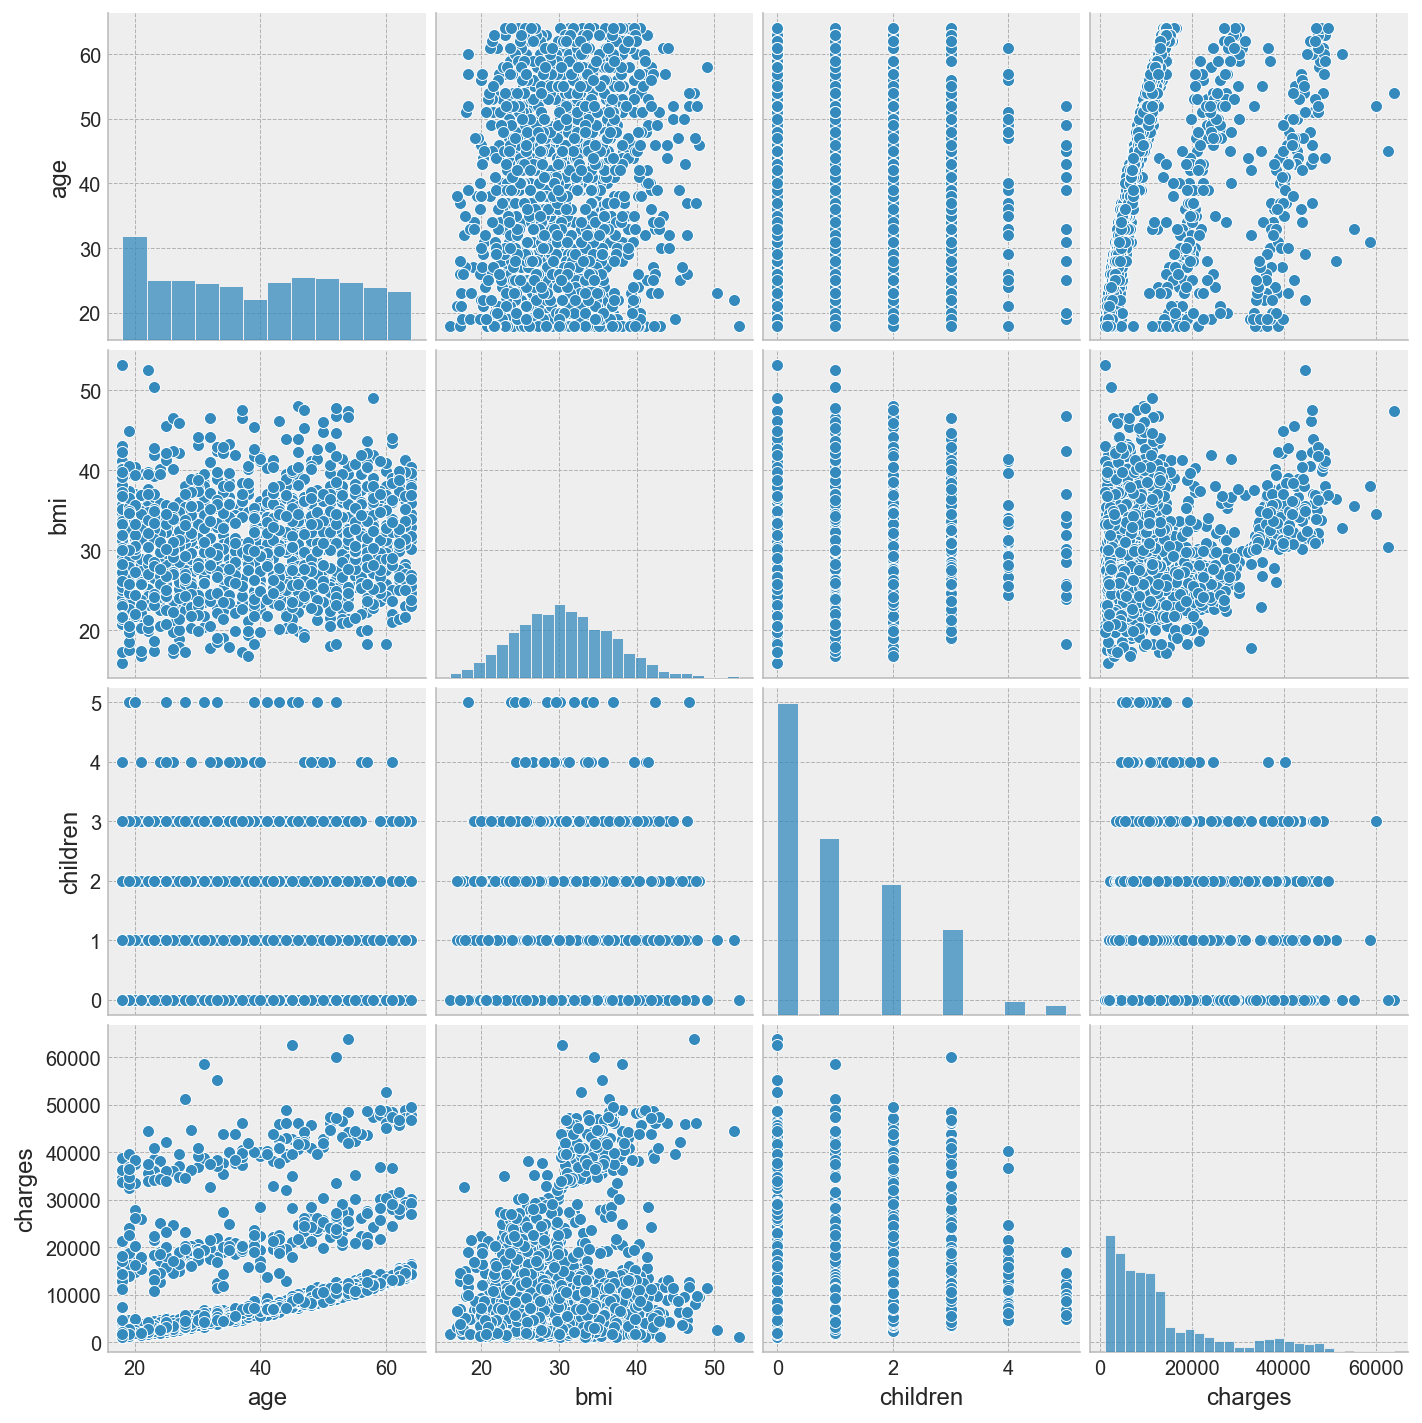

In [24]:
sns.pairplot(df1);

In [25]:
df1.to_csv(r"C:\Users\psath\Downloads\Machine Learning(Insurance)\insurance_cleaned.csv", index = False)

In [26]:
medical_df1 = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Insurance)\insurance_cleaned.csv", skipinitialspace = True)

In [27]:
medical_df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


## Machine Learning Problem
* Build a system which can take features of Insurance like age, sex, bmi, children, smoker, region, etc.. and predicts the charges of Medical Insurance.

Target Variable: Charges

## Identfing the Input and the Output Variables

In [28]:
y = medical_df1['charges']
x = medical_df1[['age','sex','bmi','children','smoker','region']]

In [29]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [30]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Sepearting the Data into Train and Test

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


In [32]:
x_train

,age,sex,bmi,children,smoker,region
1074,32,female,29.590,1,no,southeast
131,61,female,22.040,0,no,northeast
15,19,male,24.600,1,no,southwest
824,64,female,31.825,2,no,northeast
1136,26,female,22.230,0,no,northwest
...,...,...,...,...,...,...
763,45,female,25.175,2,no,northeast
835,36,male,31.500,0,no,southwest
1216,29,male,37.290,2,no,southeast
559,19,male,35.530,0,no,northwest


In [33]:
x_test

,age,sex,bmi,children,smoker,region
1247,18,female,39.82,0,no,southeast
609,47,female,29.37,1,no,southeast
393,49,male,31.35,1,no,northeast
503,19,male,30.25,0,yes,southeast
198,51,female,18.05,0,no,northwest
...,...,...,...,...,...,...
823,60,male,24.32,0,no,northwest
969,50,female,28.16,3,no,southeast
1326,51,male,30.03,1,no,southeast
792,53,male,20.90,0,yes,southeast


In [34]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


## Separating Categorical and Numerical Columns

In [35]:
x_train.head()

,age,sex,bmi,children,smoker,region
1074,32,female,29.590,1,no,southeast
131,61,female,22.040,0,no,northeast
15,19,male,24.600,1,no,southwest
824,64,female,31.825,2,no,northeast
1136,26,female,22.230,0,no,northwest


In [36]:
x_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [37]:
x_train_cat = x_train.select_dtypes(include=['object'])

x_train_cat.head()

,sex,smoker,region
1074,female,no,southeast
131,female,no,northeast
15,male,no,southwest
824,female,no,northeast
1136,female,no,northwest


In [38]:
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])

x_train_num.head()

,age,bmi,children
1074,32,29.590,1
131,61,22.040,0
15,19,24.600,1
824,64,31.825,2
1136,26,22.230,0


## Scaling the Numerical Features

In [39]:
x_train_num.head()

,age,bmi,children
1074,32,29.590,1
131,61,22.040,0
15,19,24.600,1
824,64,31.825,2
1136,26,22.230,0


In [40]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_transformed = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_transformed.head()

,age,bmi,children
1074,-0.515609,-0.200981,-0.073709
131,1.539050,-1.435875,-0.894334
15,-1.436663,-1.017156,-0.073709
824,1.751601,0.164581,0.746916
1136,-0.940711,-1.404799,-0.894334


In [41]:
x_train_num_transformed.describe()

,age,bmi,children
count,1.002000e+03,1.002000e+03,1.002000e+03
mean,1.329608e-16,4.848639e-16,3.368341e-17
std,1.000499e+00,1.000499e+00,1.000499e+00
min,-1.507514e+00,-2.430334e+00,-8.943336e-01
25%,-9.229985e-01,-7.211086e-01,-8.943336e-01
50%,-1.965707e-02,-5.295694e-02,-7.370881e-02
75%,8.305467e-01,6.748949e-01,7.469160e-01
max,1.751601e+00,3.649274e+00,3.208790e+00


In [42]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.27744511 30.81877246  1.08982036]
Std of each column: [14.1142639   6.11388146  1.21858372]


## Applying OneHotEncoding on Categorical Columns

In [43]:
x_train_cat['sex'].value_counts(normalize=True)

female    0.50499
male      0.49501
Name: sex, dtype: float64

In [44]:
x_train_cat['smoker'].value_counts(normalize=True)

no     0.799401
yes    0.200599
Name: smoker, dtype: float64

In [45]:
x_train_cat['region'].value_counts(normalize=True)

southeast    0.266467
southwest    0.250499
northwest    0.245509
northeast    0.237525
Name: region, dtype: float64

In [46]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat), 
                               columns=encoder.get_feature_names_out(x_train_cat.columns), 
                               index = x_train_cat.index)

x_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1074,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
824,0.0,0.0,0.0,0.0,0.0
1136,0.0,0.0,1.0,0.0,0.0


## Concatinating the Encoded Categorical Features and Transformed Numerical Features

In [47]:
x_train_transformed = pd.concat([x_train_num_transformed, x_train_cat_ohe], axis=1)

x_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1074,-0.515609,-0.200981,-0.073709,0.0,0.0,0.0,1.0,0.0
131,1.539050,-1.435875,-0.894334,0.0,0.0,0.0,0.0,0.0
15,-1.436663,-1.017156,-0.073709,1.0,0.0,0.0,0.0,1.0
824,1.751601,0.164581,0.746916,0.0,0.0,0.0,0.0,0.0
1136,-0.940711,-1.404799,-0.894334,0.0,0.0,1.0,0.0,0.0


## Preparing Test Data

In [48]:
x_test.head()

,age,sex,bmi,children,smoker,region
1247,18,female,39.82,0,no,southeast
609,47,female,29.37,1,no,southeast
393,49,male,31.35,1,no,northeast
503,19,male,30.25,0,yes,southeast
198,51,female,18.05,0,no,northwest


In [49]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 1247 to 634
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [50]:
x_test_cat = x_test.select_dtypes(include=['object'])

x_test_cat.head()

,sex,smoker,region
1247,female,no,southeast
609,female,no,southeast
393,male,no,northeast
503,male,yes,southeast
198,female,no,northwest


In [51]:
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])

x_test_num.head()

,age,bmi,children
1247,18,39.82,0
609,47,29.37,1
393,49,31.35,1
503,19,30.25,0
198,51,18.05,0


In [52]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_transformed.head()

,age,bmi,children
1247,-1.507514,1.472261,-0.894334
609,0.547145,-0.236964,-0.073709
393,0.688846,0.086889,-0.073709
503,-1.436663,-0.093030,-0.894334
198,0.830547,-2.088489,-0.894334


In [53]:
x_test_cat_ohe = pd.DataFrame(index = x_test_cat.index)

x_test_cat_ohe.head()

""
1247
609
393
503
198


In [54]:
x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat), 
                               columns=encoder.get_feature_names_out(x_test_cat.columns), 
                               index = x_test_cat.index)

x_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1247,0.0,0.0,0.0,1.0,0.0
609,0.0,0.0,0.0,1.0,0.0
393,1.0,0.0,0.0,0.0,0.0
503,1.0,1.0,0.0,1.0,0.0
198,0.0,0.0,1.0,0.0,0.0


In [55]:
x_test_transformed = pd.concat([x_test_num_transformed, x_test_cat_ohe], axis=1)

x_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1247,-1.507514,1.472261,-0.894334,0.0,0.0,0.0,1.0,0.0
609,0.547145,-0.236964,-0.073709,0.0,0.0,0.0,1.0,0.0
393,0.688846,0.086889,-0.073709,1.0,0.0,0.0,0.0,0.0
503,-1.436663,-0.093030,-0.894334,1.0,1.0,0.0,1.0,0.0
198,0.830547,-2.088489,-0.894334,0.0,0.0,1.0,0.0,0.0


## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_transformed, y_train)

LinearRegression()

In [57]:
y_test_pred = regressor.predict(x_test_transformed)

In [58]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1247,1633.9618,5019.619800
609,8547.6913,9401.168015
393,9290.1395,11354.742008
503,32548.3405,26301.842606
198,9644.2525,7002.395922


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

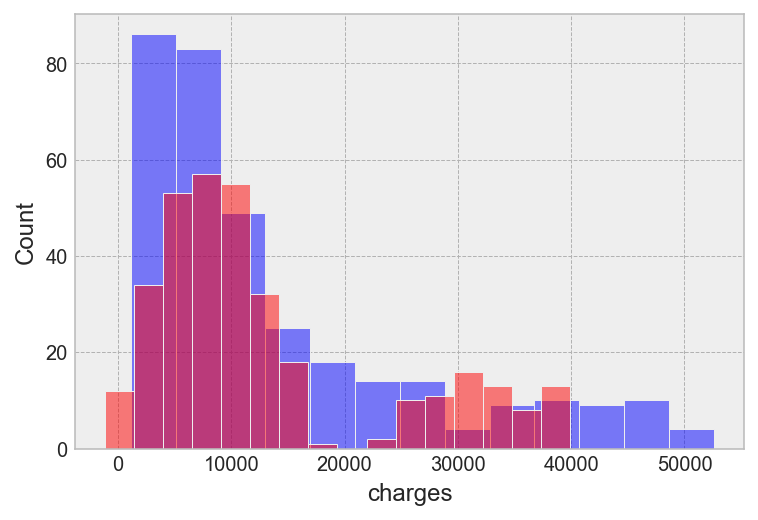

In [59]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [60]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4375.91593201863
Mean Squared Error:  40842992.19329188
Root Mean Squared Error:  6390.852227464807


## KNN Regression

In [61]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_transformed, y_train)

KNeighborsRegressor()

In [62]:
y_test_pred = regressor.predict(x_test_transformed)

In [63]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1247,1633.9618,4211.890170
609,8547.6913,7948.160220
393,9290.1395,9336.827060
503,32548.3405,21088.622942
198,9644.2525,10466.076060


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

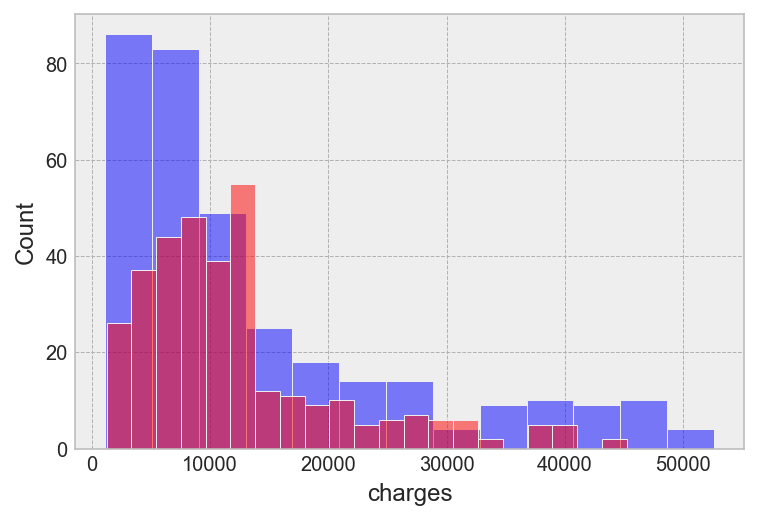

In [64]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [65]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4411.027263250746
Mean Squared Error:  52461043.074568816
Root Mean Squared Error:  7242.999590954621


## Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_transformed, y_train)

DecisionTreeRegressor()

In [67]:
y_test_pred = regressor.predict(x_test_transformed)

In [68]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1247,1633.9618,1634.5734
609,8547.6913,8062.7640
393,9290.1395,9778.3472
503,32548.3405,33732.6867
198,9644.2525,9264.7970


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

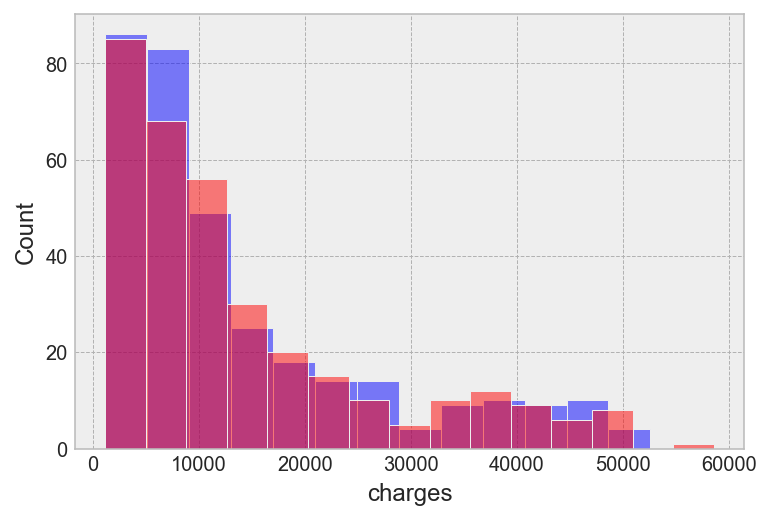

In [69]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [70]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3363.625357743283
Mean Squared Error:  46602875.7206895
Root Mean Squared Error:  6826.629894808235


## Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_transformed, y_train)

RandomForestRegressor()

In [72]:
y_test_pred = regressor.predict(x_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1247,1633.9618,2129.618255
609,8547.6913,11175.208274
393,9290.1395,9287.829148
503,32548.3405,34836.853164
198,9644.2525,10225.891873


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

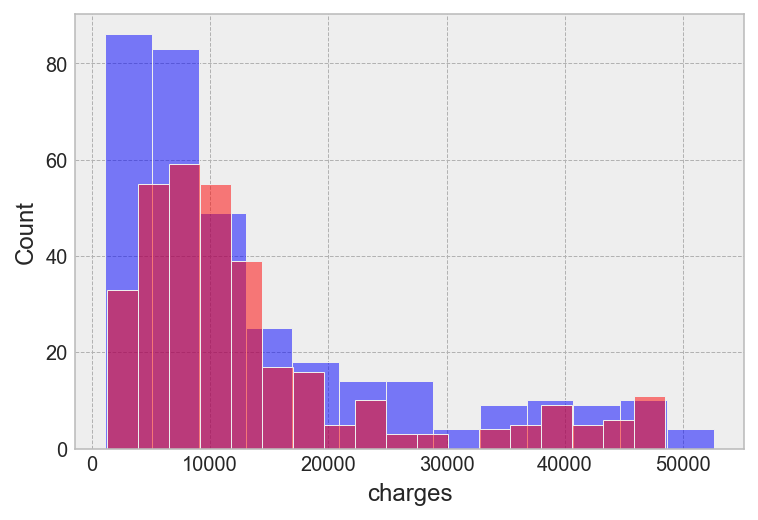

In [74]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2914.114319877812
Mean Squared Error:  26129836.041176263
Root Mean Squared Error:  5111.735130185862


## Support Vector Regressor

In [76]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train_transformed, y_train)

SVR()

In [82]:
y_test_pred = regressor.predict(x_test_transformed)

In [78]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1247,1633.9618,9407.182585
609,8547.6913,9467.797465
393,9290.1395,9486.658138
503,32548.3405,9418.791114
198,9644.2525,9476.697232


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

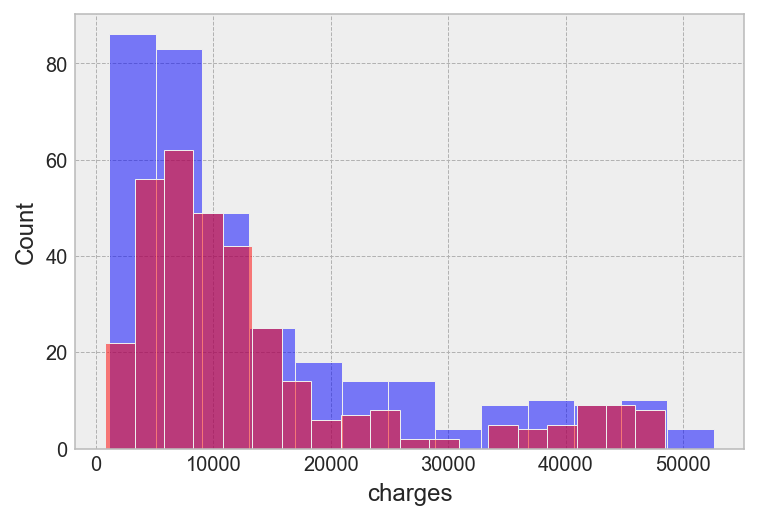

In [85]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [80]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8897.32889132303
Mean Squared Error:  178824804.01165572
Root Mean Squared Error:  13372.539175925256


## Gradient Boosting Regressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train_transformed, y_train)

GradientBoostingRegressor()

In [83]:
y_test_pred = regressor.predict(x_test_transformed)

In [84]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1247,1633.9618,2484.435124
609,8547.6913,9144.809409
393,9290.1395,10821.663280
503,32548.3405,34896.209982
198,9644.2525,11095.675881


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

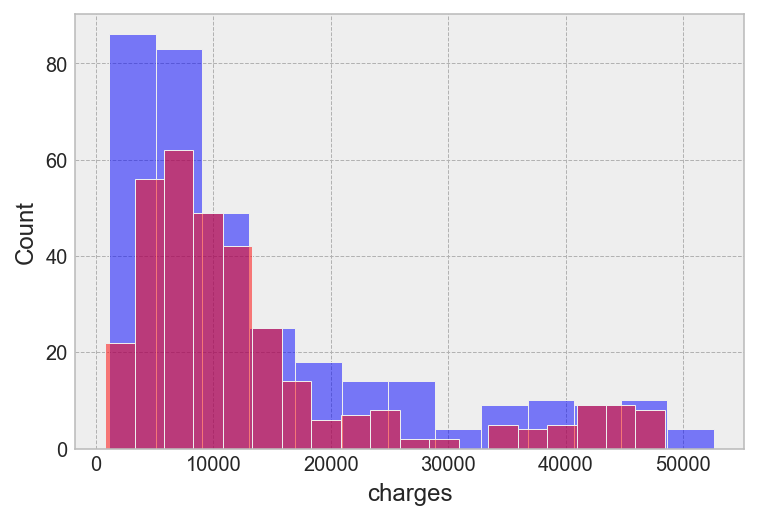

In [86]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [87]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2742.21809443557
Mean Squared Error:  24064099.20848329
Root Mean Squared Error:  4905.517221301266


## Observation
From Above Observaqtions it is clear that Gradient Boost is best suited algorithm for this task

 Algorithm-------------------Mean Absolute Error\
 LinearRegression------------4375.91593201863\
 KNN Regressor---------------4411.027263250746\
 Decision Tree Regression----3428.459216967164\
 Random Forest Regression----2940.217558239976\
 Support Vector Regressor----8897.32889132303\
 Gradient Boosting Regressor-2742.21809443557